### Name: Tej Dave
### Student ID: 128280211

In [333]:
import pandas as pd

### Reading the Dataset

In [334]:
header = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','goal']
df = pd.read_csv('processed.cleveland.csv',names=header)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  goal      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [336]:
df.shape

(303, 14)

In [337]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,goal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [338]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
goal          5
dtype: int64

### Data Cleaning

<p>By comparing the unique value with of each varible with metadata provided, following varibles are found to have more values. We shall be checking the frequency distribution of the following columns: </p>

* CA 
* Thal
* Goal

In [339]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [340]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [341]:
df['goal'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: goal, dtype: int64

From the above results, I came to know that the dataset have null values represted by "?".

I will choose to drop such columns.

Checking for the Null value in DataFrame.

In [342]:
df[df.eq('?').any(1)] #running equality check on df to find any  cell valued "?"

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


There are in total 6 observations haveing "?" in either "ca" or "thal".

In [343]:
df.drop(df.loc[df["ca"] == "?", "ca"].index, axis=0,inplace=True)

In [344]:
df.drop(df.loc[df["thal"] == "?", "thal"].index, axis=0,inplace=True)

In [345]:
print(df['ca'].value_counts())
print(df['thal'].value_counts())

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64


### Checking Duplicate

In [346]:
df_duplicate = df[df.duplicated()].count()
df_duplicate

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
goal        0
dtype: int64

* The dataframe doesn't have any duplicate observations

### Exploratory Analysis

* Checking Correlation of Target "Goal" variable with other variables

In [347]:
round(df.corr()["goal"],2).sort_values(ascending=False)

goal        1.00
oldpeak     0.50
cp          0.40
exang       0.39
slope       0.37
sex         0.23
age         0.22
restecg     0.18
trestbps    0.16
chol        0.07
fbs         0.05
thalach    -0.42
Name: goal, dtype: float64

<p>As it can be learned from the above result the goal is correlated with oldpeak, cp level, exang,  and slop. However, it is worth noticing the goal is not related with choland fbs as the value of correlation is nearly 0. Also, thalach and goal shows negative correlation, which means the increase in the value of one variable with negatively impact the other varible.</p>

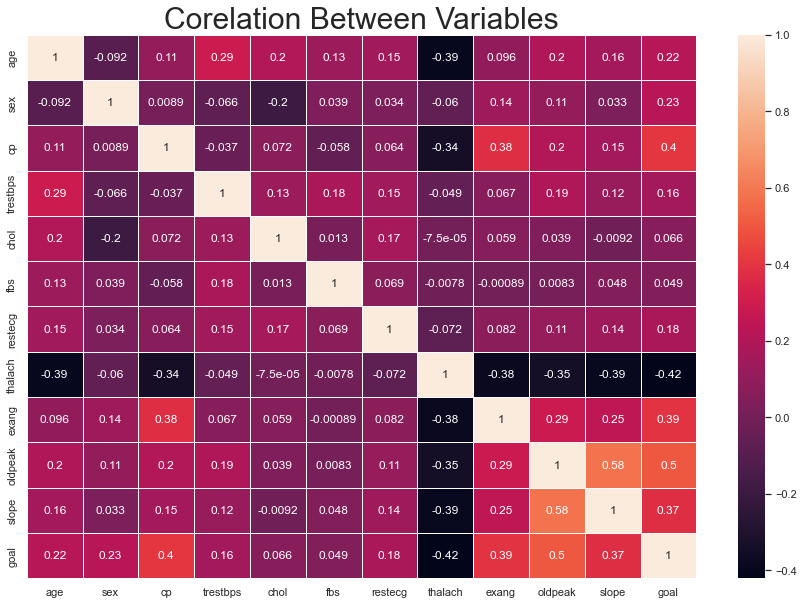

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5)
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

* Using Boxplot to check for outliers

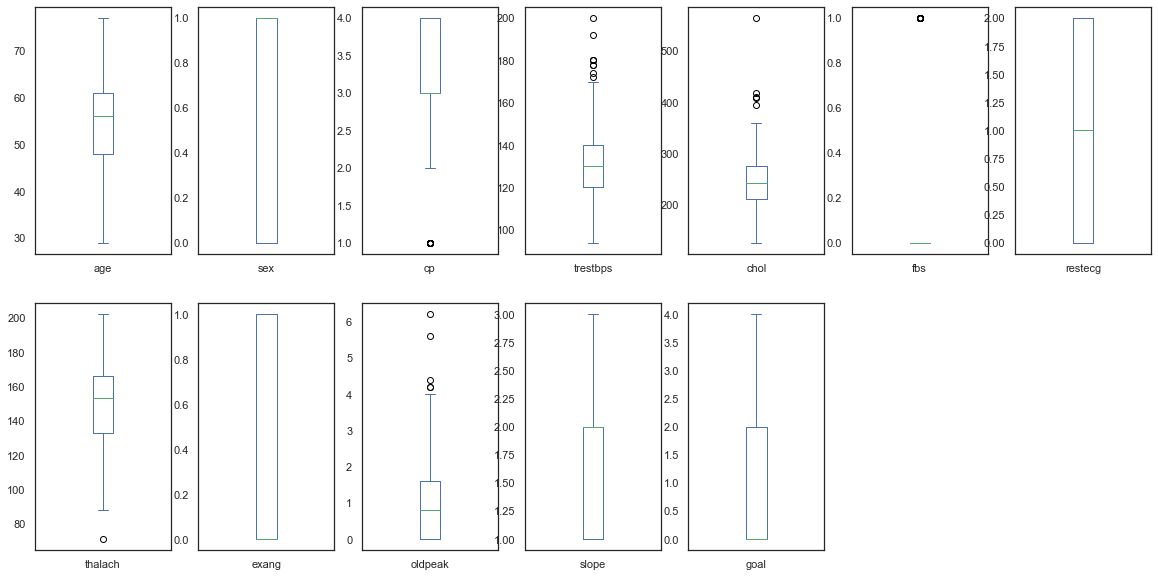

In [349]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10));

* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    seems like there are some outliers in the varible. 
* chol: serum cholestoral in mg/dl
* oldpeak = ST depression induced by exercise relative to rest
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* We shall be using histogram to understand the distribution of the datapoints.

* Checking Sex distribution

<AxesSubplot:>

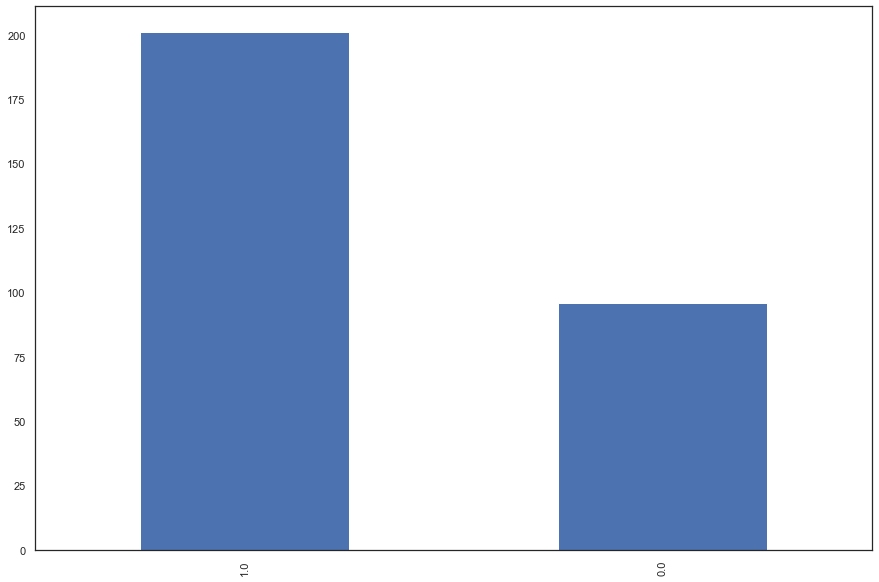

In [350]:
df['sex'].value_counts().plot(kind='bar')

* From the above result we can say that Male are more likely to have heart proble compared to Female.

* Checking CP level compared to goal (target varible).

cp: chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='goal'>

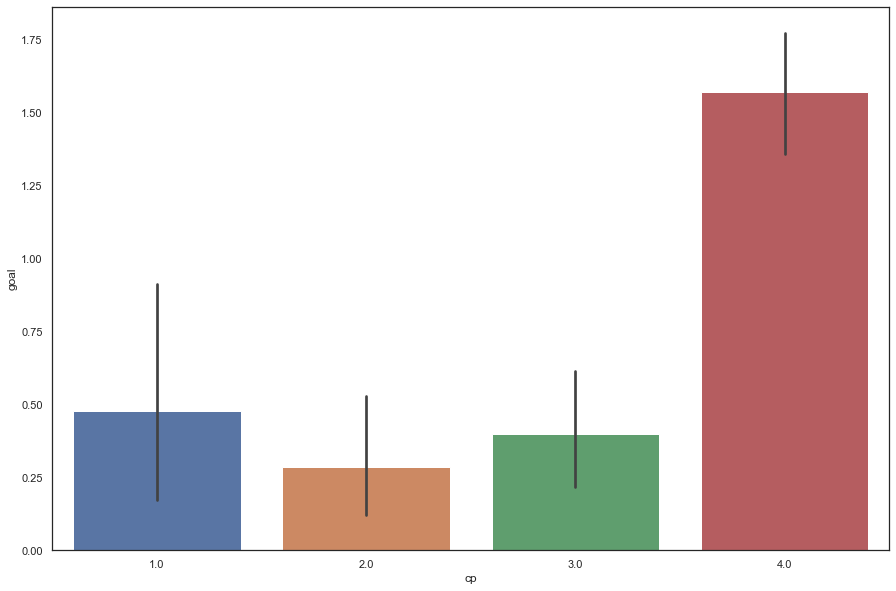

In [351]:
sns.barplot(df["cp"],df['goal'])

In [352]:
df['cp'].value_counts()

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64

* From the above result we can say, most of the patient have the chest pain of type 4: asymptomatic, followed by typical angina and non-anginal pain.

* oldpeak = ST depression induced by exercise relative to rest

### Detecting Outliers

<AxesSubplot:>

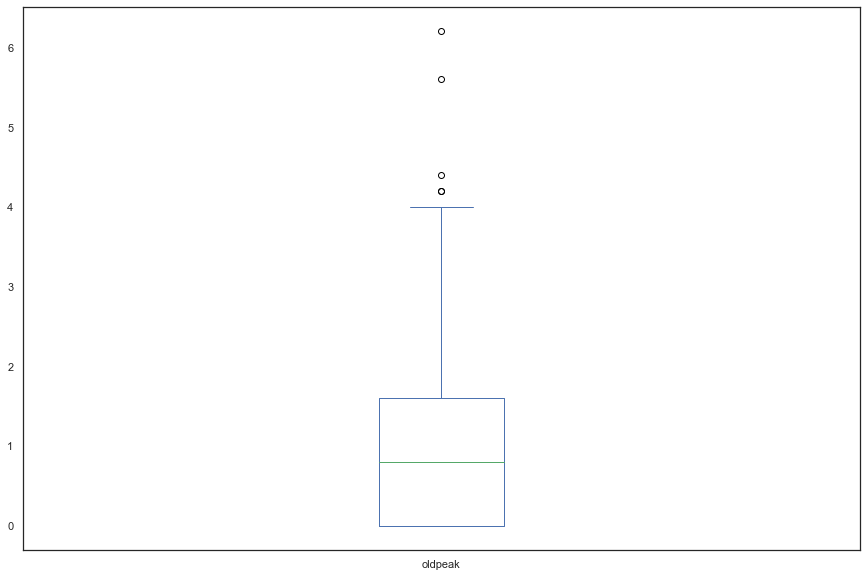

In [353]:
df['oldpeak'].plot(kind='box')

<AxesSubplot:>

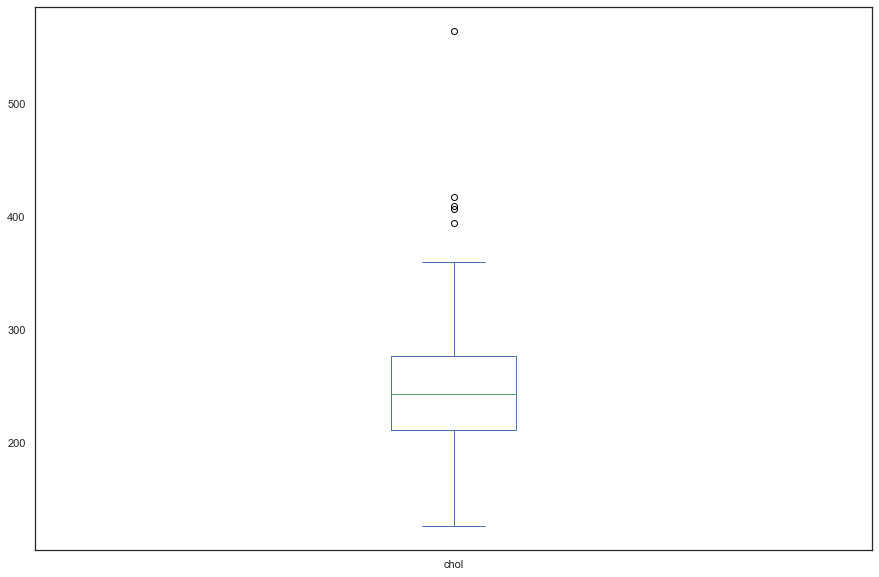

In [354]:
df['chol'].plot(kind='box')

<AxesSubplot:>

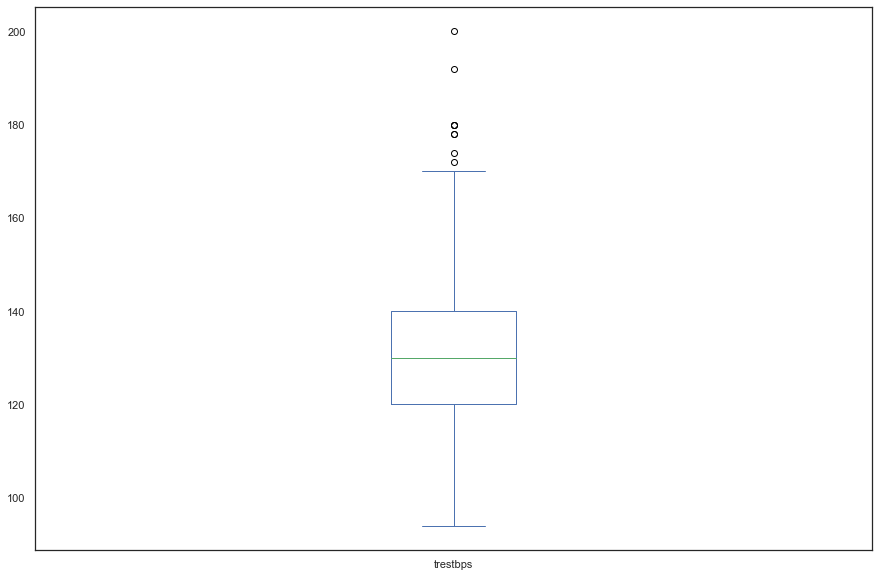

In [355]:
df['trestbps'].plot(kind='box')

<AxesSubplot:>

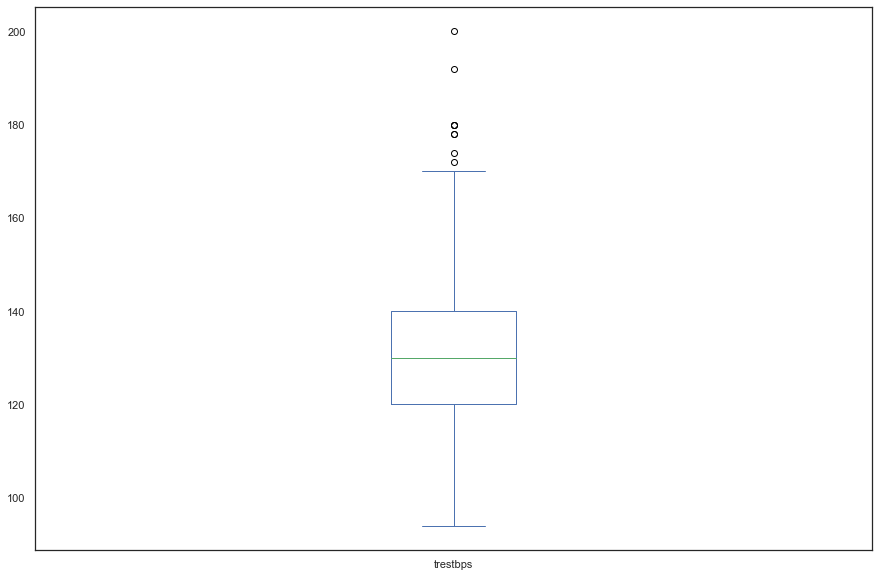

In [356]:
df['trestbps'].plot(kind='box')

In [357]:
df['fbs'].value_counts()

0.0    254
1.0     43
Name: fbs, dtype: int64

In [358]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

* For variable oldpeak

In [359]:
outliers = find_outliers_IQR(df['oldpeak'])

print('number of outliers: '+ str(len(outliers)))

outliers

number of outliers: 5


91     6.2
123    5.6
183    4.2
191    4.2
285    4.4
Name: oldpeak, dtype: float64

In [360]:
df.drop(index=outliers.index,inplace=True)

* For Variable chol

In [361]:
outliers = find_outliers_IQR(df['chol'])

print('number of outliers: '+ str(len(outliers)))

outliers

number of outliers: 5


48     417.0
121    407.0
152    564.0
173    394.0
181    409.0
Name: chol, dtype: float64

In [362]:
df.drop(index=outliers.index,inplace=True)

* For variable trestbps

In [363]:
outliers = find_outliers_IQR(df['trestbps'])

print('number of outliers: '+ str(len(outliers)))
 
outliers.index

number of outliers: 8


Int64Index([14, 83, 126, 172, 188, 201, 213, 231], dtype='int64')

In [364]:
df.drop(index=outliers.index,inplace=True)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       279 non-null    float64
 1   sex       279 non-null    float64
 2   cp        279 non-null    float64
 3   trestbps  279 non-null    float64
 4   chol      279 non-null    float64
 5   fbs       279 non-null    float64
 6   restecg   279 non-null    float64
 7   thalach   279 non-null    float64
 8   exang     279 non-null    float64
 9   oldpeak   279 non-null    float64
 10  slope     279 non-null    float64
 11  ca        279 non-null    object 
 12  thal      279 non-null    object 
 13  goal      279 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 32.7+ KB


* we are left with 279 observation from 297 Observations.

### Building Model

In [366]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 

In [367]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'],
      dtype='object')

In [368]:
predictors = df[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].values

target = df["goal"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=3) # spliting training and testset

### Model: LogisticRegression Model

In [369]:
lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [370]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
result = cross_val_score(model , predictors, target, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.6018831168831169


### Model: KNN with K Fold cross validation

In [371]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


In [372]:
Ks = 5
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.53571429, 0.55357143, 0.55357143, 0.57142857])

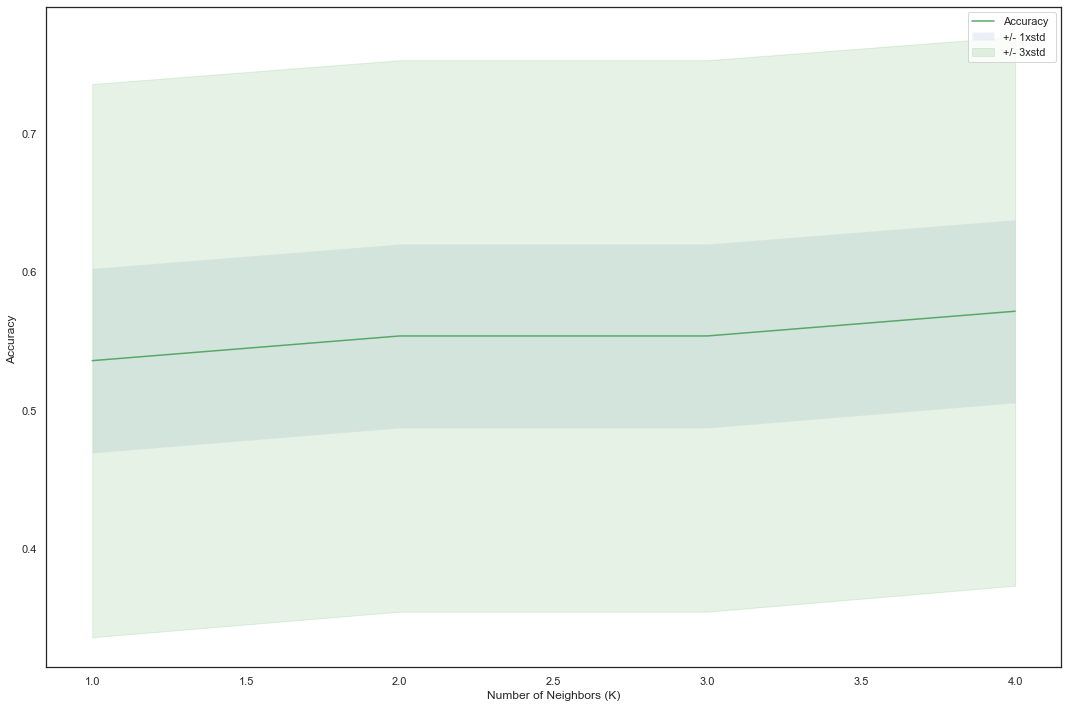

In [373]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [374]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


The best accuracy was with 0.5714285714285714 with k= 4


### Model: Decision Tree

In [375]:
from sklearn.tree import DecisionTreeClassifier

In [376]:
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [377]:
decisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [378]:
predTree = decisionTree.predict(X_test)

In [379]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.5892857142857143


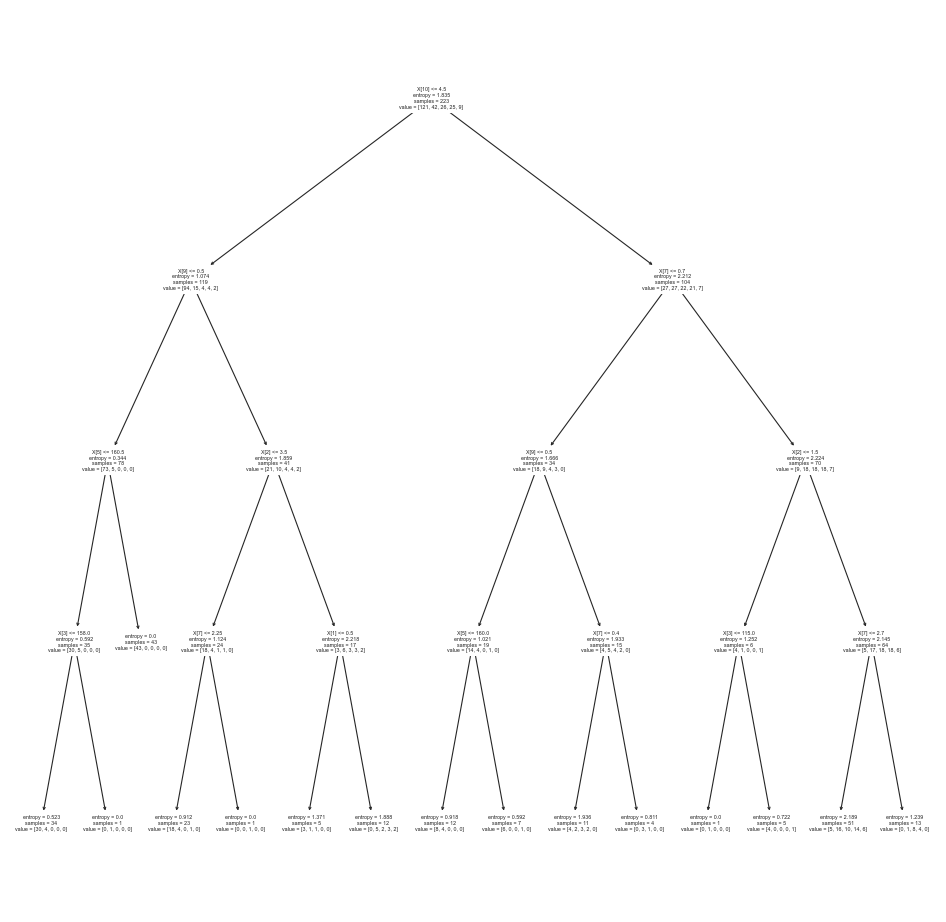

In [380]:
import sklearn.tree as tree
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=80)
tree.plot_tree(decisionTree)
plt.show()